In [1]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions
from astropy.wcs import WCS
from astropy.io import fits

import jwst_plots
import isochrone_plots
from jwst_plots import JWSTCatalog, make_cat_use
from isochrone_plots import Isochrone

import importlib as imp

from astropy.visualization import simple_norm

from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC
from dust_extinction.parameter_averages import CCM89

In [76]:
imp.reload(jwst_plots)
imp.reload(isochrone_plots)

<module 'isochrone_plots' from '/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/isochrone_plots.py'>

In [4]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
#'/home/savannahgramze/research/Research/JWST/cloudc/'

# Catalog Setup

In [5]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [6]:
reg_filament = Regions.read(f'./regions_/filament_short.region')
reg_filament_long = Regions.read(f'./regions_/filament_long.region')

In [7]:
cat_use = make_cat_use()

In [8]:
mask_reg = cat_use.get_region_mask(reg_filament, wcs=ww)
cat_use_in = JWSTCatalog(cat_use.catalog[mask_reg])

In [9]:
mask_reg_long = cat_use.get_region_mask(reg_filament_long, wcs=ww)
cat_use_in_long = JWSTCatalog(cat_use.catalog[mask_reg_long])

# Isochrone Setup

In [10]:
iso_basepath = '/orange/adamginsburg/jwst/brick/'
mist = Table.read(f'{iso_basepath}/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd', 
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')

In [11]:
## 3 kpc arm
#dist = 5*u.kpc
#Av = 15
## Other Arm
#dist = 4*u.kpc
#Av = 7
## Galactic Center
dist = 8*u.kpc
Av = 30

iso_mist_5 = isochrone_plots.Isochrone(mist, distance=dist, age=5, Av=Av)
iso_mist_10 = isochrone_plots.Isochrone(mist, distance=dist, age=10, Av=Av, ext=RRP89_MWGC())

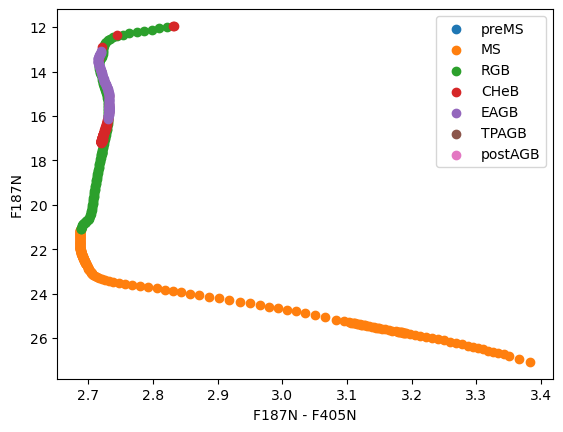

In [12]:
ax = plt.subplot(111)
iso_mist_10.plot_phase(phase=-1, label='preMS')
iso_mist_10.plot_phase(phase=0, label='MS')
iso_mist_10.plot_phase(phase=2, label='RGB')
iso_mist_10.plot_phase(phase=3, label='CHeB')
iso_mist_10.plot_phase(phase=4, label='EAGB')
iso_mist_10.plot_phase(phase=5, label='TPAGB')
iso_mist_10.plot_phase(phase=6, label='postAGB')
ax.legend()
plt.gca().invert_yaxis()
#ax.set_xlim(2.68, 2.75)

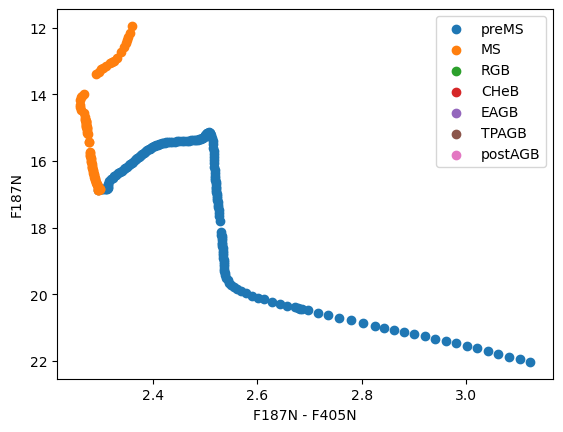

In [17]:
ax = plt.subplot(111)
iso_mist_5.plot_phase(phase=-1, label='preMS')
iso_mist_5.plot_phase(phase=0, label='MS')
iso_mist_5.plot_phase(phase=2, label='RGB')
iso_mist_5.plot_phase(phase=3, label='CHeB')
iso_mist_5.plot_phase(phase=4, label='EAGB')
iso_mist_5.plot_phase(phase=5, label='TPAGB')
iso_mist_5.plot_phase(phase=6, label='postAGB')
ax.legend()
plt.gca().invert_yaxis()
#ax.set_xlim(2.68, 2.75)

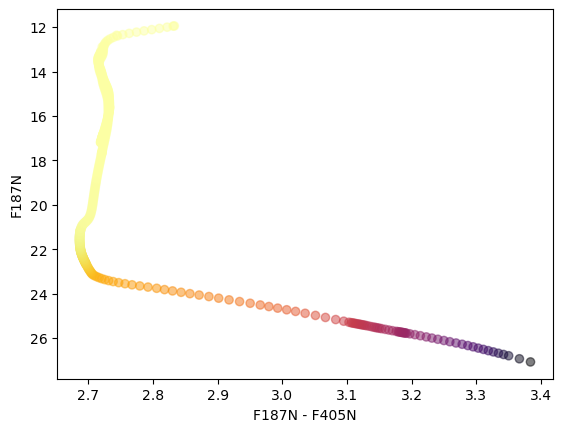

In [13]:
# Just the isochrone
ax = plt.subplot(111)
iso_mist_10.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at {dist.value} kpc Av={Av}', cmap='inferno',
                     c=iso_mist_10.M_init, norm=simple_norm(iso_mist_10.M_init, stretch='asinh'))

#plt.scatter(2.72, 17.3, marker='x', color='red', s=100, label='red clump')
plt.gca().invert_yaxis()
#plt.xlim(2.65, 2.8)

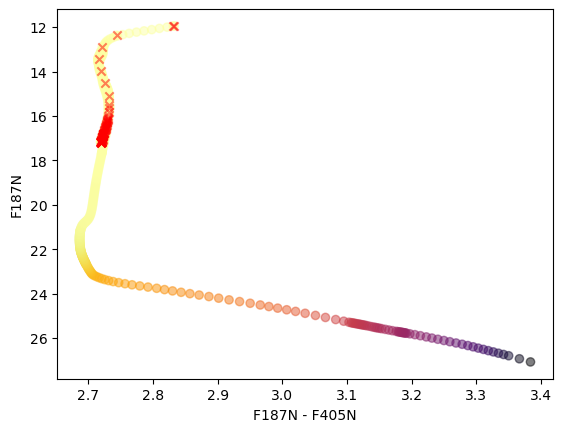

In [14]:
# Just the isochrone
ax = plt.subplot(111)
iso_mist_10.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at {dist.value} kpc Av={Av}', cmap='inferno',
                     c=iso_mist_10.M_init, norm=simple_norm(iso_mist_10.M_init, stretch='asinh'))
iso_mist_10.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')

plt.gca().invert_yaxis()
#plt.xlim(2.65, 2.8)

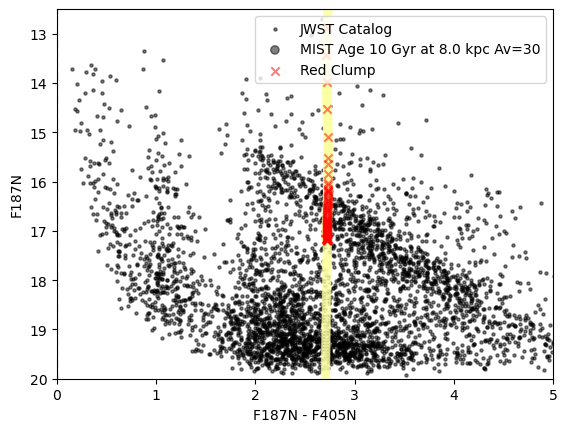

In [18]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)
iso_mist_10.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at {dist.value} kpc Av={Av}', cmap='inferno',
                     c=iso_mist_10.M_init, norm=simple_norm(iso_mist_10.M_init, stretch='asinh'))
iso_mist_10.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')

ax.set_ylim(20,12.5)
ax.set_xlim(0, 5)
ax.axvline(0, linestyle='--', color='k')
#ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

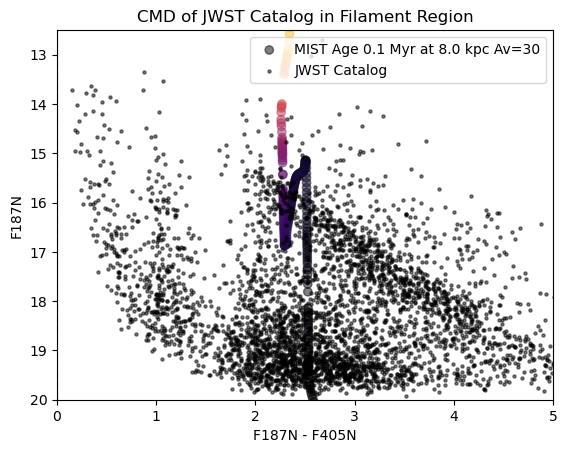

In [16]:
ax = plt.subplot(111)
iso_mist_5.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 0.1 Myr at {dist.value} kpc Av={Av}', cmap='inferno',
                        c=iso_mist_5.M_init, norm=simple_norm(iso_mist_5.M_init, stretch='asinh'))
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)

ax.set_ylim(20,12.5)
ax.set_xlim(0, 5)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

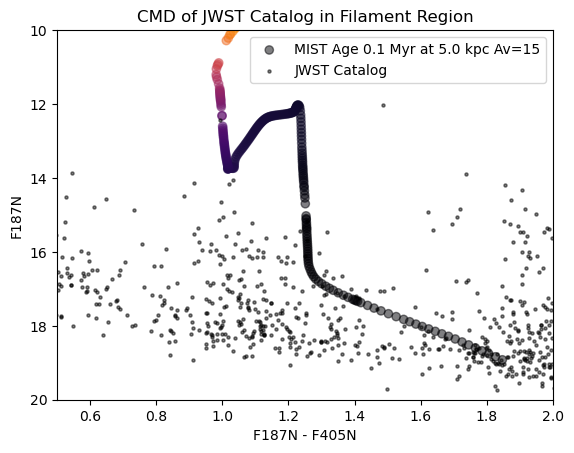

In [20]:
ax = plt.subplot(111)
iso_mist_5.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 0.1 Myr at {dist.value} kpc Av={Av}', cmap='inferno',
                        c=iso_mist_5.M_init, norm=simple_norm(iso_mist_5.M_init, stretch='asinh'))
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)

ax.set_ylim(25,5)
#ax.set_xlim(-0.6, 0.5)
ax.set_xlim(0.5, 2)
ax.set_ylim(20,10)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

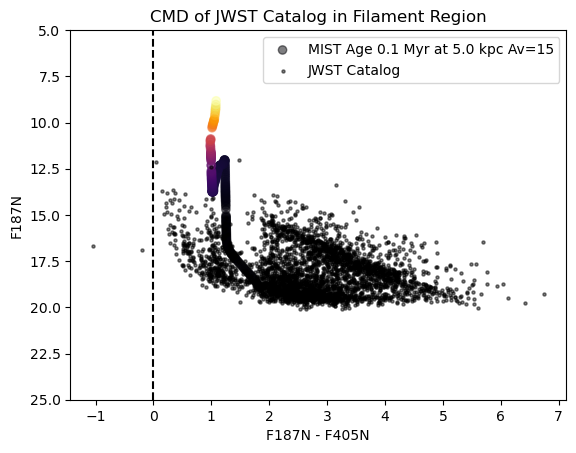

In [21]:
ax = plt.subplot(111)
iso_mist_5.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 0.1 Myr at {dist.value} kpc Av={Av}', cmap='inferno',
                        c=iso_mist_5.M_init, norm=simple_norm(iso_mist_5.M_init, stretch='asinh'))
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)

ax.set_ylim(25,5)
#ax.set_xlim(-0.6, 0.5)
#ax.set_xlim(-0.6, 0.6)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

Text(0.5, 1.0, 'CMD of JWST Catalog in Filament Region')

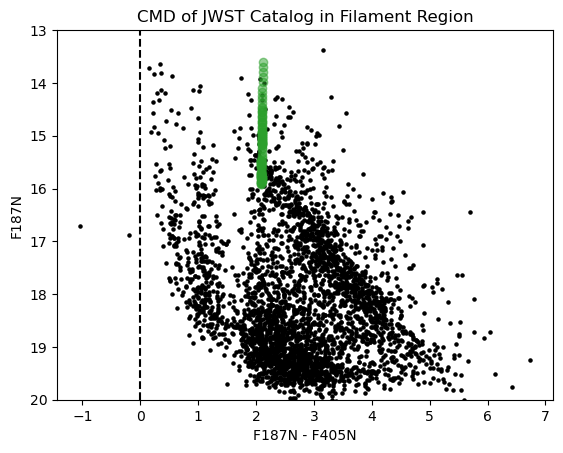

In [22]:
dist = 5*u.kpc
Av = 25
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=1)
for age in [5, 7, 9]:
    iso_mist = isochrone_plots.Isochrone(mist, distance=dist, age=age, Av=Av)
    ax = plt.subplot(111)
    iso_mist.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'MIST Age {(10**age*u.yr).to(u.Myr)} at {dist.value} kpc Av={Av}')

ax.set_ylim(20,13)
#ax.set_xlim(0.5, 2)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
#ax.legend(loc='upper left')

Text(0.5, 1.0, 'CMD of JWST Catalog in Filament Region')

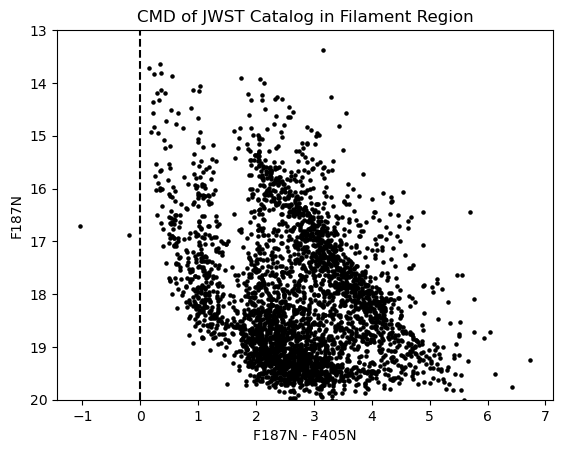

In [23]:
dist = 5*u.kpc
Av = 25
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=1)

ax.set_ylim(20,13)
#ax.set_xlim(0.5, 2)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
#ax.legend(loc='upper left')

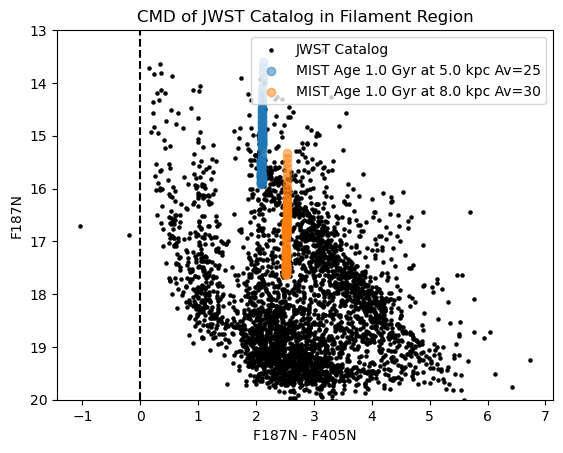

In [24]:
age = 9
Av = 25
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=1)
for pair in [(5*u.kpc, 25), (8*u.kpc, 30)]:
    iso_mist = isochrone_plots.Isochrone(mist, distance=pair[0], age=age, Av=pair[1])
    ax = plt.subplot(111)
    iso_mist.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'MIST Age {(10**age*u.yr).to(u.Gyr)} at {pair[0].value} kpc Av={pair[1]}')

ax.set_ylim(20,13)
#ax.set_xlim(0.5, 2)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

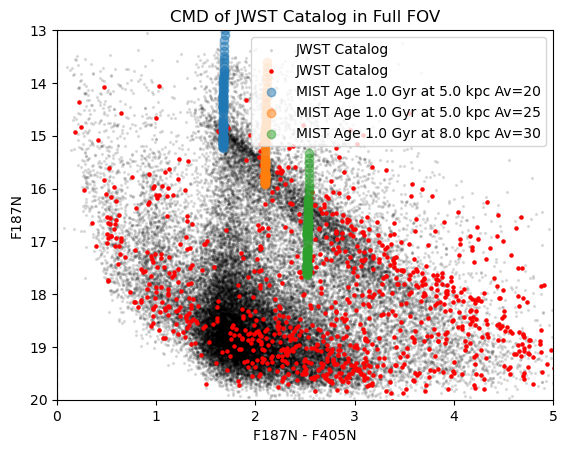

In [31]:
age = 9
Av = 25
ax = plt.subplot(111)
cat_use.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=2, alpha=0.1)
cat_use_long.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='red', s=5, alpha=1)
for pair in [(5*u.kpc, 20), (5*u.kpc, 25), (8*u.kpc, 30)]:
    iso_mist = isochrone_plots.Isochrone(mist, distance=pair[0], age=age, Av=pair[1])
    ax = plt.subplot(111)
    iso_mist.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'MIST Age {(10**age*u.yr).to(u.Gyr)} at {pair[0].value} kpc Av={pair[1]}')

ax.set_ylim(20,13)
ax.set_xlim(0, 5)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Full FOV')
ax.legend()

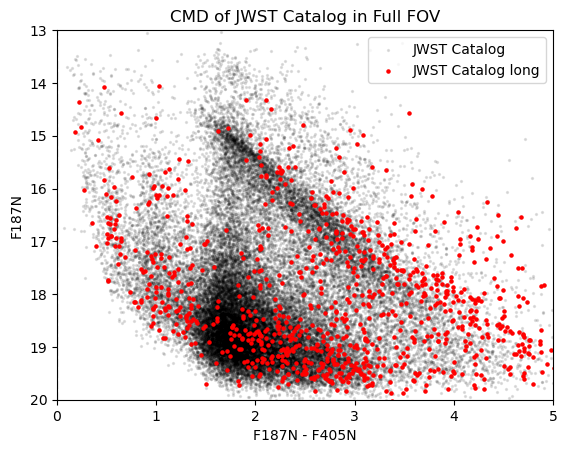

In [32]:
age = 9
Av = 25
ax = plt.subplot(111)
cat_use.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=2, alpha=0.1)
cat_use_long.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog long', c='red', s=5, alpha=1)

ax.set_ylim(20,13)
ax.set_xlim(0, 5)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Full FOV')
ax.legend()

# Test

In [94]:
iso_mist_10_gc = isochrone_plots.get_mist_isochrone(distance=8*u.kpc, age=10, Av=30, ext=CT06_MWGC())
iso_mist_5_gc = isochrone_plots.get_mist_isochrone(distance=8*u.kpc, age=5, Av=30, ext=CT06_MWGC())
iso_mist_10_3k = isochrone_plots.get_mist_isochrone(distance=5*u.kpc, age=10, Av=20, ext=RRP89_MWGC())
iso_mist_5_3k = isochrone_plots.get_mist_isochrone(distance=5*u.kpc, age=5, Av=20, ext=RRP89_MWGC())

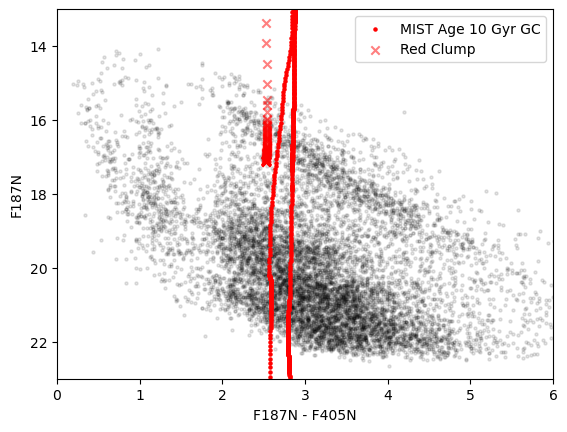

In [82]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, c='k', s=5, alpha=0.1)
iso_mist_10_gc.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 10 Gyr GC', c='r', s=5, alpha=1)
#iso_mist_5_gc.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 0.1 Myr GC', c='b', s=5, alpha=1)
#iso_mist_10_3k.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 10 Gyr 3kpc', c='g', s=5, alpha=1)
#iso_mist_5_3k.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 0.1 Myr 3kpc', c='y', s=5, alpha=1)
#iso_mist_10.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 10 Gyr', c='r', s=5, alpha=1)
#iso_mist_9.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 9 Gyr', c='g', s=5, alpha=1)
#iso_mist_5.plot_CMD('f182m', 'f410m', 'f182m', ax=ax, label='MIST Age 5 Gyr', c='b', s=5, alpha=1)
iso_mist_10_gc.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')
#iso_mist_10_3k.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')

ax.set_xlim(0, 6)
ax.set_ylim(23, 13)
ax.legend()
#plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Av = 20, 5 kpc, Age = 10.0 Gyr')

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


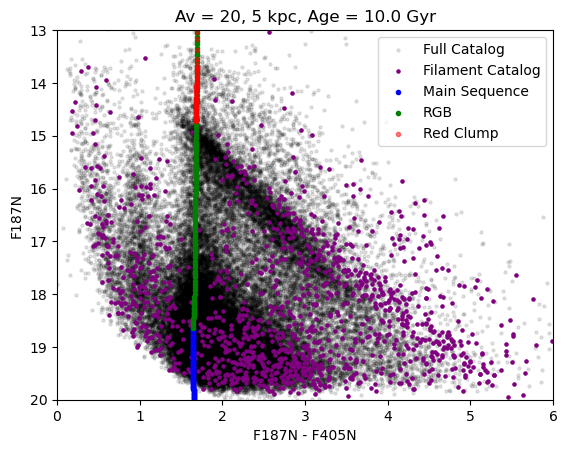

In [104]:
ax = plt.subplot(111)
cat_use.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, c='k', s=5, alpha=0.1, label='Full Catalog')
cat_use_in_long.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, c='purple', s=5, alpha=1, label='Filament Catalog')
#iso_mist_10_gc.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at 8 kpc Av=30', cmap='inferno', 
#                              c=iso_mist_10_gc.M_init, norm=simple_norm(iso_mist_10_gc.M_init, stretch='asinh'))
#iso_mist_10_gc.plot_phase(phase=0, ax=ax, label=f'Main Sequence', color='blue', marker='.')
#iso_mist_10_gc.plot_phase(phase=2, ax=ax, label=f'RGB', color='green', marker='.')
#iso_mist_10_gc.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')
#iso_mist_10_3k.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at 5 kpc Av=23', cmap='inferno',
#                                c=iso_mist_10_3k.M_init, norm=simple_norm(iso_mist_10_3k.M_init, stretch='asinh'))

iso_mist_10_3k.plot_phase(phase=0, ax=ax, label=f'Main Sequence', color='blue', marker='.')
iso_mist_10_3k.plot_phase(phase=2, ax=ax, label=f'RGB', color='green', marker='.')
iso_mist_10_3k.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='.')

#iso_mist_10_gc.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr GC', c='r', s=5, alpha=1)
#iso_mist_5_gc.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 0.1 Myr GC', c='b', s=5, alpha=1)
#iso_mist_10_3k.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr 3kpc', c='g', s=5, alpha=1)
#iso_mist_5_3k.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 0.1 Myr 3kpc', c='y', s=5, alpha=1)
#iso_mist_10.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr', c='r', s=5, alpha=1)
#iso_mist_9.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 9 Gyr', c='g', s=5, alpha=1)
#iso_mist_5.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 5 Gyr', c='b', s=5, alpha=1)

ax.set_xlim(0, 6)
ax.set_ylim(20, 13)
ax.legend()
ax.set_title(f'Av = 20, 5 kpc, Age = {(10**10*u.year).to(u.Gyr)}')
#plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Av = 20, 5 kpc, Age = 0.09999999999999999 Myr')

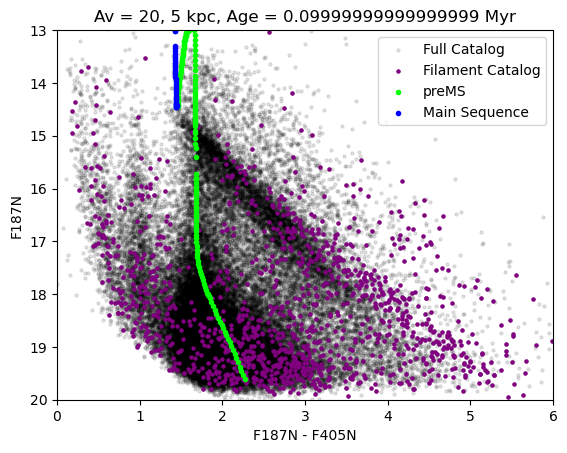

In [110]:
ax = plt.subplot(111)
cat_use.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, c='k', s=5, alpha=0.1, label='Full Catalog')
cat_use_in_long.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, c='purple', s=5, alpha=1, label='Filament Catalog')
#iso_mist_10_gc.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at 8 kpc Av=30', cmap='inferno', 
#                              c=iso_mist_10_gc.M_init, norm=simple_norm(iso_mist_10_gc.M_init, stretch='asinh'))
#iso_mist_10_gc.plot_phase(phase=0, ax=ax, label=f'Main Sequence', color='blue', marker='.')
#iso_mist_10_gc.plot_phase(phase=2, ax=ax, label=f'RGB 10 Gyr', color='green', marker='.')
#iso_mist_10_gc.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')
#iso_mist_10_3k.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at 5 kpc Av=23', cmap='inferno',
#                                c=iso_mist_10_3k.M_init, norm=simple_norm(iso_mist_10_3k.M_init, stretch='asinh'))

iso_mist_5_3k.plot_phase(phase=-1, ax=ax, label=f'preMS', color='lime', marker='.')
iso_mist_5_3k.plot_phase(phase=0, ax=ax, label=f'Main Sequence', color='blue', marker='.')
#iso_mist_5_3k.plot_phase(phase=2, ax=ax, label=f'RGB', color='green', marker='.')
#iso_mist_5_3k.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='.')

#iso_mist_10_gc.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr GC', c='r', s=5, alpha=1)
#iso_mist_5_gc.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 0.1 Myr GC', c='b', s=5, alpha=1)
#iso_mist_10_3k.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr 3kpc', c='g', s=5, alpha=1)
#iso_mist_5_3k.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 0.1 Myr 3kpc', c='y', s=5, alpha=1)
#iso_mist_10.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr', c='r', s=5, alpha=1)
#iso_mist_9.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 9 Gyr', c='g', s=5, alpha=1)
#iso_mist_5.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 5 Gyr', c='b', s=5, alpha=1)

ax.set_xlim(0, 6)
ax.set_ylim(20, 13)
ax.legend()
ax.set_title(f'Av = 20, 5 kpc, Age = {(10**5*u.year).to(u.Myr)}')
#plt.gca().invert_yaxis()

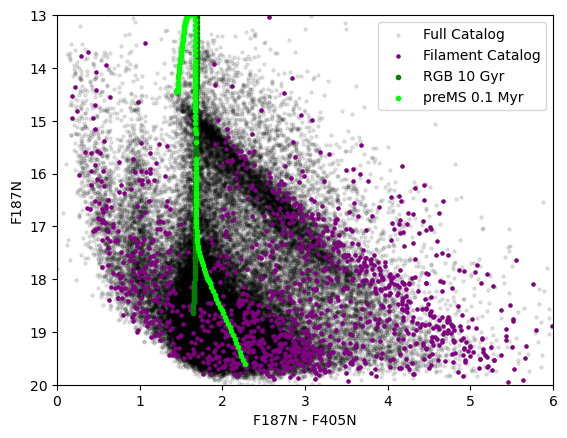

In [112]:
ax = plt.subplot(111)
cat_use.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, c='k', s=5, alpha=0.1, label='Full Catalog')
cat_use_in_long.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, c='purple', s=5, alpha=1, label='Filament Catalog')
#iso_mist_10_gc.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at 8 kpc Av=30', cmap='inferno', 
#                              c=iso_mist_10_gc.M_init, norm=simple_norm(iso_mist_10_gc.M_init, stretch='asinh'))
#iso_mist_10_gc.plot_phase(phase=0, ax=ax, label=f'Main Sequence', color='blue', marker='.')
#iso_mist_10_gc.plot_phase(phase=2, ax=ax, label=f'RGB', color='green', marker='.')
#iso_mist_10_gc.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='x')
#iso_mist_10_3k.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at 5 kpc Av=23', cmap='inferno',
#                                c=iso_mist_10_3k.M_init, norm=simple_norm(iso_mist_10_3k.M_init, stretch='asinh'))

iso_mist_10_3k.plot_phase(phase=2, ax=ax, label=f'RGB 10 Gyr', color='green', marker='.')
iso_mist_5_3k.plot_phase(phase=-1, ax=ax, label=f'preMS 0.1 Myr', color='lime', marker='.')
#iso_mist_5_3k.plot_phase(phase=0, ax=ax, label=f'Main Sequence', color='blue', marker='.')
#iso_mist_5_3k.plot_phase(phase=2, ax=ax, label=f'RGB', color='green', marker='.')
#iso_mist_5_3k.plot_phase(phase=3, ax=ax, alpha=0.5, label=f'Red Clump', color='red', marker='.')

#iso_mist_10_gc.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr GC', c='r', s=5, alpha=1)
#iso_mist_5_gc.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 0.1 Myr GC', c='b', s=5, alpha=1)
#iso_mist_10_3k.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr 3kpc', c='g', s=5, alpha=1)
#iso_mist_5_3k.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 0.1 Myr 3kpc', c='y', s=5, alpha=1)
#iso_mist_10.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 10 Gyr', c='r', s=5, alpha=1)
#iso_mist_9.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 9 Gyr', c='g', s=5, alpha=1)
#iso_mist_5.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='MIST Age 5 Gyr', c='b', s=5, alpha=1)

ax.set_xlim(0, 6)
ax.set_ylim(20, 13)
ax.legend()
#ax.set_title(f'Av = 20, 5 kpc, Age = {(10**5*u.year).to(u.Myr)}')
#plt.gca().invert_yaxis()